**The food delivery time prediction model is essential in the food delivery industry, where timely and accurate deliveries are critical for customer satisfaction and overall experience.**

**To create an effective prediction model, we started by meticulously cleaning the dataset to eliminate errors and inconsistencies, ensuring the reliability and accuracy of the predictions.**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load & Understand Data

In [2]:
df_train = pd.read_csv('Data/raw/train.csv')
df_train.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [4]:
print("Train dataset :" ,df_train.shape)

Train dataset : (45593, 20)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
# CHECK STATISTICAL VALUES FOR NUMERICAL COLUMNS
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [7]:
# CHECK STATISTICAL VALUES FOR OTHER THAN NUMERICAL COLUMNS
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x5fb2,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


### OBSERVATIONS:

1. There are null values present in Time_Ordered column.
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.
3. Both numerical and categorical features are present.
4. ID and Delivery_person_ID will not be used to build model.

In [8]:
# explore each column
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------")

ID
ID
0x5fb2     1
0x4607     1
0xb379     1
0x5d6d     1
0x7a6a     1
          ..
0xdb64     1
0xc8b6     1
0x2784     1
0xd987     1
0xcdcd     1
Name: count, Length: 45593, dtype: int64
------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01       67
JAPRES11DEL02        67
VADRES08DEL02        66
RANCHIRES02DEL01     66
HYDRES04DEL02        66
                     ..
BHPRES15DEL03         7
GOARES01DEL03         7
KOLRES09DEL03         6
KOCRES16DEL03         6
BHPRES010DEL03        5
Name: count, Length: 1320, dtype: int64
------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------
Delivery_p

# Data Cleaning

In [9]:
# update column names
def update_column_name(df):
    #renaming weatherconditions column
    df.rename(columns={"Weatherconditions":"Weather_conditions"}, inplace = True)
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [10]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01_understanding_and_cleaning_data.ipynb',
 'city_freq_map_v1.pkl',
 'city_freq_mean_v1.pkl',
 'Code Work',
 'Data',
 'features_v1.pkl',
 'models',
 'model_v1.pkl',
 'notebooks',
 'onehot_v1.pkl',
 'ordinal_encoder_v1.pkl',
 'README.md',
 'reports',
 'Requirements.txt',
 'scaler_v1.pkl',
 'src',
 'traffic_order_v1.pkl']

In [137]:
os.chdir("..")

In [10]:
# extract relevant values from column
def extract_column_value(df):
    #extract time and convert it into int
    df["Time_taken(min)"] = df["Time_taken(min)"].apply(lambda x : int(x.split(" ")[1].strip()))
    #extract weather conditions
    df["Weather_conditions"] = df["Weather_conditions"].apply(lambda x : x.split (" ")[1].strip())
    #extract city code from Delivey person ID
    df["City_code"] = df["Delivery_person_ID"].str.split("RES", expand=True)[0]
extract_column_value(df_train)
df_train[["Time_taken(min)", "Weather_conditions", "City_code"]].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [11]:
# drop columns that are not used for building model
def drop_columns(df):
    df.drop(["ID","Delivery_person_ID"], axis =1,inplace = True)

print("Before No. of columns: ", df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [12]:
# check for duplicate values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate value present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [13]:
#Update Datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df["Delivery_person_Age"].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

update_datatype(df_train)

In [14]:
df_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,JAP
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,AGR
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,CHEN
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,COIMB


## EXPLORATORY DATA ANALYSIS

1. I Prefer exploratory data analysis (EDA) before handling null or missing values because they themselves tells a different story and sometimes add weightage to the modelling itself.
2. in this project i didnt went for the outliers also because in predicting ETA they are real world edge cases means they are not mistakes but real incidents imputing then will only make model worse and increases confidence in wrong predictions.so lets dive into eda and decide which  model will be best in these cases.

### Univariate Analysis

In [15]:
df_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'City_code'],
      dtype='object')

<Axes: xlabel='Time_taken(min)', ylabel='Count'>

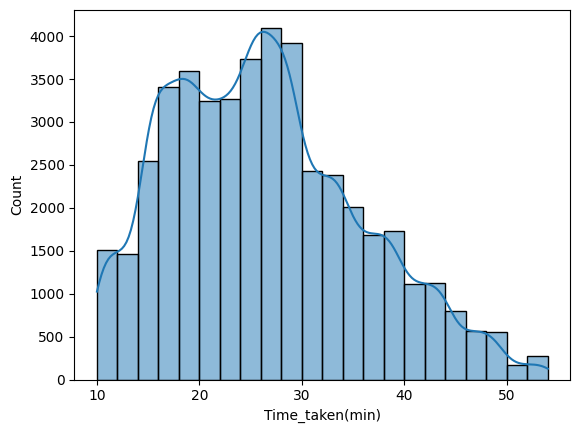

In [16]:
sns.histplot(data = df_train['Time_taken(min)'],bins = 30,kde = True,binwidth = 2)

<Axes: xlabel='Delivery_person_Age', ylabel='Count'>

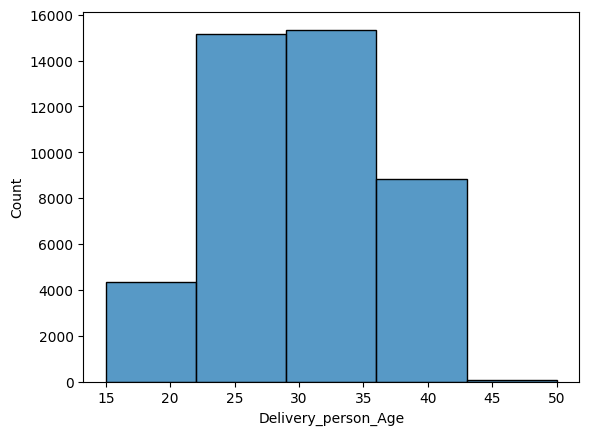

In [17]:
sns.histplot(data = df_train['Delivery_person_Age'], bins=5,binwidth = 7)

<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

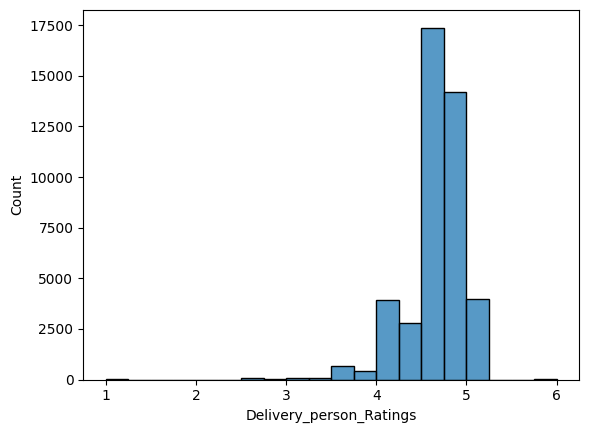

In [18]:
sns.histplot(data = df_train['Delivery_person_Ratings'],bins = 20)

#### Many features here are need to be extracted since they are maskedby indirect features which wont give any information in eda so lets extract some and then we can continue with eda.

In [19]:
df_train[df_train["Time_Orderd"].isna()]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code


In [20]:
# CONVERT STRING 'NaN' TO np.nan
def convert_nan(df):
    df.replace("NaN", float(np.nan), regex=True, inplace = True)

convert_nan(df_train)

In [21]:
# check null values
df_train.isnull().sum().sort_values(ascending= False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Restaurant_latitude               0
Order_Date                        0
Restaurant_longitude              0
Time_Order_picked                 0
Delivery_location_latitude        0
Delivery_location_longitude       0
Vehicle_condition                 0
Type_of_vehicle                   0
Type_of_order                     0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [22]:
df_train.columns[df_train.isna().any()]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Orderd',
       'Weather_conditions', 'Road_traffic_density', 'multiple_deliveries',
       'Festival', 'City'],
      dtype='object')

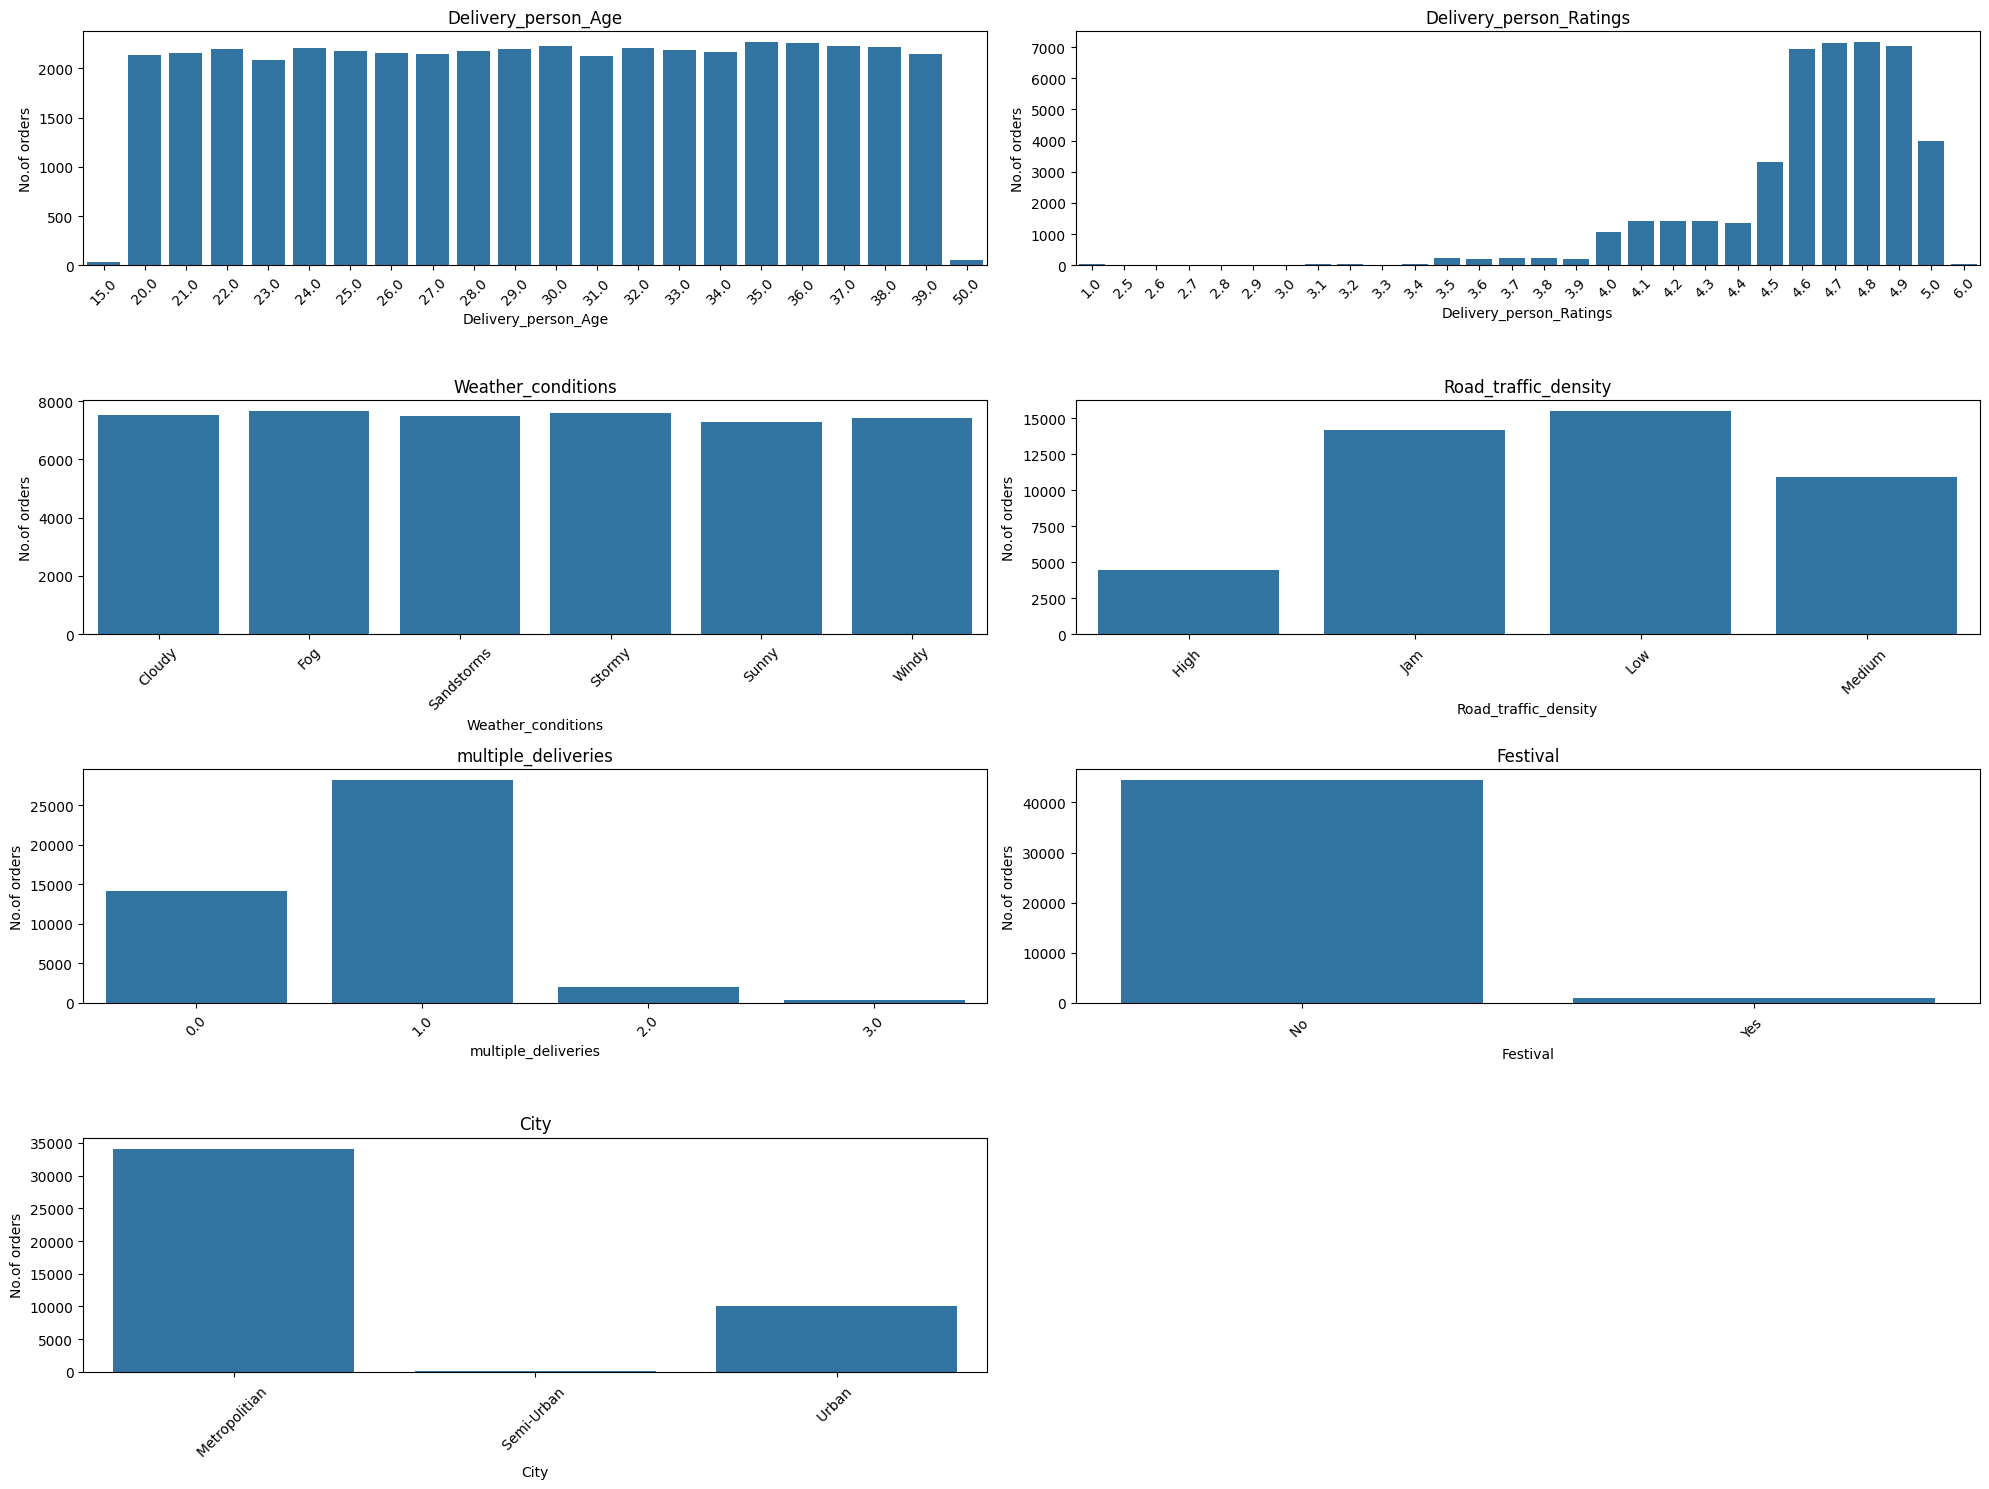

In [23]:
#lets explore columns that have null values

cols = ['Delivery_person_Age', 'Delivery_person_Ratings','Weather_conditions', 'Road_traffic_density', 'multiple_deliveries','Festival', 'City']
num_plots =  len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data = df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel("No.of orders")
    ax.set_title(column_name)
    ax.tick_params(axis = "x", rotation = 45)

if num_plots %2 != 0:
    fig.delaxes(axes[-1,-1])

plt.tight_layout()
plt.show()

In [24]:
#Handle null values
def handle_null_values(df):
    df["Delivery_person_Age"].fillna(np.random.choice(df["Delivery_person_Age"]), inplace = True)
    df["Weather_conditions"].fillna(np.random.choice(df["Weather_conditions"]), inplace = True)
    df["City"].fillna(df["City"].mode()[0], inplace = True)
    df["Festival"].fillna(df["Festival"].mode()[0], inplace = True)
    df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0], inplace = True)
    df["Road_traffic_density"].fillna(df["Road_traffic_density"].mode()[0], inplace = True)
    df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].median(), inplace = True)

handle_null_values(df_train)
df_train.isnull().sum()
    
    

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [25]:
df_train[df_train["Time_Orderd"].isna()]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
42,25.0,4.7,19.121999,72.908493,19.201999,72.988493,2022-04-06,NaN,18:35:00,Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,MUM
74,25.0,4.7,12.935662,77.614130,12.975662,77.654130,2022-03-11,NaN,15:30:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,19,BANG
120,25.0,4.7,22.312790,73.170283,22.422790,73.280283,2022-04-02,NaN,18:25:00,Cloudy,Low,3,Snack,electric_scooter,0.0,No,Metropolitian,25,VAD
140,25.0,4.7,18.543626,73.905101,18.573626,73.935101,2022-03-09,NaN,23:40:00,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,PUNE
179,25.0,4.7,26.913483,75.803139,26.983483,75.873139,2022-03-12,NaN,17:50:00,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,JAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45405,25.0,4.7,26.470000,80.350000,26.610000,80.490000,2022-02-12,NaN,19:25:00,Windy,Jam,1,Drinks,scooter,1.0,No,Metropolitian,18,KNP
45504,25.0,4.7,-12.978453,-77.643685,12.998453,77.663685,2022-03-17,NaN,09:30:00,Cloudy,Low,3,Meal,scooter,1.0,No,Metropolitian,24,BANG
45518,25.0,4.7,22.727021,75.884167,22.737021,75.894167,2022-03-19,NaN,11:40:00,Cloudy,Low,3,Snack,electric_scooter,0.0,No,Metropolitian,25,INDO
45519,25.0,4.7,27.160934,78.044095,27.170934,78.054095,2022-02-13,NaN,09:05:00,Cloudy,Low,3,Meal,electric_scooter,1.0,No,Urban,17,AGR


## Feature Engineering

In [26]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data["day_of_week"] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data["is_weekend"] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()
    

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [30]:
df_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,2022,3,0,0,0,0,0,0,0,10.0
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,2022,2,0,0,0,0,0,0,0,15.0
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,2022,4,0,0,0,0,0,0,0,15.0
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,2022,0,0,0,0,0,0,0,0,5.0


In [32]:
#Calculate Time Differnce 
def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    #df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    
    #df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    df['Time_Order_picked_formatted'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Time_Order_picked'].astype(str),errors='coerce')

    df['Time_Ordered_formatted'] = pd.to_datetime(df['Order_Date'].astype(str) + ' ' + df['Time_Orderd'].astype(str),errors='coerce')

    df['Time_Order_picked_formatted']=df['Time_Order_picked_formatted']+ pd.to_timedelta((df['Time_Order_picked_formatted'] < df['Time_Ordered_formatted'] ).fillna(False).astype(int),unit='D')
    
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df.groupby('City')['order_prepare_time'].transform('median'),inplace=True)
    
    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

calculate_time_diff(df_train)

df_train.head()

KeyError: 'Order_Date'

In [34]:
df_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend',
       'order_prepare_time'],
      dtype='object')

In [35]:
#calculate distance between restaurant location and delivery location

def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    restaurant_coordinates = df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery).km for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])


calculate_distance(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.020737
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.143737
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1.549693
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7.774497
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.197898


In [36]:
categorical_columns = df_train.select_dtypes(include='object').columns

In [37]:
categorical_columns

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'City_code'],
      dtype='object')

In [38]:
df_train['City'].nunique()

3

In [39]:
df=df_train

### Train-Test Split

In [34]:
#Split features & label
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

#split the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36474, 29)
(9119, 29)
(36474,)
(9119,)


In [35]:
X_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'City_code', 'day', 'month', 'quarter', 'year', 'day_of_week',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time',
       'distance'],
      dtype='object')

### Frequency Encoding ---> "City_code"

In [36]:
city_freq = X_train['City_code'].value_counts(normalize = True)

X_train['City_code_freq'] = X_train['City_code'].map(city_freq)
X_test['City_code_freq'] = X_test['City_code'].map(city_freq).fillna(0)

#Drop original column

X_train.drop(columns=['City_code'], inplace=True)
X_test.drop(columns=['City_code'], inplace=True)

In [37]:

X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance,City_code_freq
7725,30.0,5.0,22.744648,75.894377,22.824648,75.974377,Fog,Medium,0,Snack,...,0,0,0,0,0,0,1,15.0,12.081765,0.068844
949,31.0,4.7,21.173343,72.792731,21.263343,72.882731,Fog,Jam,2,Drinks,...,0,1,0,1,0,0,0,5.0,13.660197,0.069639
44893,35.0,3.6,11.026117,76.944652,11.116117,77.034652,Stormy,Jam,2,Drinks,...,0,0,0,0,0,0,0,10.0,13.993120,0.069200
42071,35.0,4.6,13.029780,80.208812,13.139780,80.318812,Stormy,Medium,0,Buffet,...,0,0,0,0,0,0,0,10.0,17.041194,0.068569
27091,20.0,4.6,23.359407,85.325055,23.429407,85.395055,Cloudy,Jam,0,Meal,...,0,0,0,0,0,0,0,15.0,10.550013,0.070516


In [38]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance,City_code_freq
29044,37.0,4.8,22.308096,73.167753,22.318096,73.177753,Cloudy,High,0,Buffet,...,0,0,0,0,0,0,0,10.0,1.512552,0.069584
41736,28.0,4.2,12.337978,76.616792,12.367978,76.646792,Stormy,Low,0,Buffet,...,1,0,0,0,0,0,0,15.0,4.654006,0.068761
17874,24.0,4.6,22.761593,75.886362,22.831593,75.956362,Windy,Medium,2,Buffet,...,0,0,0,0,0,0,0,15.0,10.571128,0.068844
42093,34.0,4.0,22.310329,73.169083,22.350329,73.209083,Windy,High,1,Meal,...,0,0,0,0,0,0,0,10.0,6.049869,0.069584
22952,28.0,4.8,0.000000,0.000000,0.110000,0.110000,Sunny,Jam,0,Drinks,...,0,0,0,0,0,0,0,5.0,17.259377,0.015957


### Ordinal Encoding -----> Road_traffic_density

In [39]:
from sklearn.preprocessing import OrdinalEncoder

traffic_order = [['Low ','Medium ','High ','Jam ']]

ord_enc = OrdinalEncoder(categories=traffic_order)

X_train[['Road_traffic_density']] = ord_enc.fit_transform(X_train[['Road_traffic_density']])

X_test[['Road_traffic_density']] = ord_enc.transform(X_test[['Road_traffic_density']])

In [40]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance,City_code_freq
29044,37.0,4.8,22.308096,73.167753,22.318096,73.177753,Cloudy,2.0,0,Buffet,...,0,0,0,0,0,0,0,10.0,1.512552,0.069584
41736,28.0,4.2,12.337978,76.616792,12.367978,76.646792,Stormy,0.0,0,Buffet,...,1,0,0,0,0,0,0,15.0,4.654006,0.068761
17874,24.0,4.6,22.761593,75.886362,22.831593,75.956362,Windy,1.0,2,Buffet,...,0,0,0,0,0,0,0,15.0,10.571128,0.068844
42093,34.0,4.0,22.310329,73.169083,22.350329,73.209083,Windy,2.0,1,Meal,...,0,0,0,0,0,0,0,10.0,6.049869,0.069584
22952,28.0,4.8,0.000000,0.000000,0.110000,0.110000,Sunny,3.0,0,Drinks,...,0,0,0,0,0,0,0,5.0,17.259377,0.015957


In [41]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance,City_code_freq
7725,30.0,5.0,22.744648,75.894377,22.824648,75.974377,Fog,1.0,0,Snack,...,0,0,0,0,0,0,1,15.0,12.081765,0.068844
949,31.0,4.7,21.173343,72.792731,21.263343,72.882731,Fog,3.0,2,Drinks,...,0,1,0,1,0,0,0,5.0,13.660197,0.069639
44893,35.0,3.6,11.026117,76.944652,11.116117,77.034652,Stormy,3.0,2,Drinks,...,0,0,0,0,0,0,0,10.0,13.993120,0.069200
42071,35.0,4.6,13.029780,80.208812,13.139780,80.318812,Stormy,1.0,0,Buffet,...,0,0,0,0,0,0,0,10.0,17.041194,0.068569
27091,20.0,4.6,23.359407,85.325055,23.429407,85.395055,Cloudy,3.0,0,Meal,...,0,0,0,0,0,0,0,15.0,10.550013,0.070516


### One-Hot Encoding ------> Low-cardinality Nominal Columns

In [42]:
onehot_cols = ['Weather_conditions','Type_of_order','Type_of_vehicle','Festival','City']

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train[onehot_cols])
X_test_ohe = ohe.transform(X_test[onehot_cols])

ohe_cols = ohe.get_feature_names_out(onehot_cols)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)

X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

#replace original columns

X_train.drop(columns=onehot_cols, inplace=True)
X_test.drop(columns=onehot_cols, inplace=True)

X_train = pd.concat([X_train,X_train_ohe], axis=1)
X_test = pd.concat([X_test,X_test_ohe], axis=1)

In [43]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,day,...,Weather_conditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban
29044,37.0,4.8,22.308096,73.167753,22.318096,73.177753,2.0,0,1.0,21,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41736,28.0,4.2,12.337978,76.616792,12.367978,76.646792,0.0,0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17874,24.0,4.6,22.761593,75.886362,22.831593,75.956362,1.0,2,0.0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42093,34.0,4.0,22.310329,73.169083,22.350329,73.209083,2.0,1,1.0,7,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
22952,28.0,4.8,0.000000,0.000000,0.110000,0.110000,3.0,0,1.0,18,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,day,...,Weather_conditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban
7725,30.0,5.0,22.744648,75.894377,22.824648,75.974377,1.0,0,0.0,20,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
949,31.0,4.7,21.173343,72.792731,21.263343,72.882731,3.0,2,2.0,31,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44893,35.0,3.6,11.026117,76.944652,11.116117,77.034652,3.0,2,0.0,29,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42071,35.0,4.6,13.029780,80.208812,13.139780,80.318812,1.0,0,2.0,18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27091,20.0,4.6,23.359407,85.325055,23.429407,85.395055,3.0,0,1.0,29,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude',
    'order_prepare_time',
    'distance',
    'City_code_freq',
    'Vehicle_condition',
    'multiple_deliveries',
    'Road_traffic_density',
    'day_of_week']

X_train_scaled = scaler.fit_transform(X_train[scale_cols])
X_test_scaled = scaler.transform(X_test[scale_cols])

X_train.loc[:, scale_cols] = X_train_scaled
X_test.loc[:, scale_cols]  = X_test_scaled



In [46]:
X_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,day,...,Weather_conditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban
29044,1.314948,0.497115,0.644129,0.128101,0.659184,0.109645,0.507852,-1.221336,0.442494,21,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41736,-0.225717,-1.331790,-0.575262,0.278757,-0.698246,0.274313,-1.095420,-1.221336,0.442494,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17874,-0.910457,-0.112520,0.699594,0.246852,0.729237,0.241540,-0.293784,1.163983,-1.323124,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42093,0.801393,-1.941425,0.644402,0.128159,0.663581,0.111133,0.507852,-0.028677,0.442494,7,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
22952,-0.225717,0.497115,-2.084254,-3.067916,-2.370522,-3.358720,1.309488,-1.221336,0.442494,18,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
X_test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,day,...,Weather_conditions_Windy,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_Yes,City_Semi-Urban,City_Urban
7725,0.116653,1.106750,0.697521,0.247202,0.728290,0.242395,-0.293784,-1.221336,-1.323124,20,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
949,0.287838,0.192297,0.505343,0.111720,0.515291,0.095641,1.309488,1.163983,2.208111,31,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44893,0.972578,-3.160695,-0.735709,0.293078,-0.869029,0.292724,1.309488,1.163983,-1.323124,29,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42071,0.972578,-0.112520,-0.490652,0.435659,-0.592954,0.448616,-0.293784,-1.221336,2.208111,18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27091,-1.595197,-0.112520,0.772709,0.659140,0.810793,0.689574,1.309488,-1.221336,0.442494,29,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Model Building

Steps

1. Employ cross-validation & hyperparameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the models performance on the testing data to assess its accuracy nd reliability

#### Cross Validation

In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#find the best model

models=[
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor()
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth':[5, 7, 9]}
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring="r2")
    grid_search.fit(X_train,y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

    

LinearRegression:
Best parameters: {}
Best R2 score: 0.5348243858503133

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.6902713469158311

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.8078738785906147

XGBRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 20}
Best R2 score: 0.8120126605033875



## Model Building

In [85]:
# create a xgb regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# fit the model on the training data
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Model Evaluation

In [86]:
# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 3.2
Mean Squared Error (MSE): 16.24
Root Mean Squared Error (RMSE): 4.03
R-squared (R2) Score: 0.81


## Integrity checks

In [87]:
baseline_pred = np.full_like(y_test, y_train.mean())

In [88]:
baseline_pred

array([26, 26, 26, ..., 26, 26, 26], shape=(9119,))

In [91]:
r2_baseline = r2_score(y_test,baseline_pred)

In [92]:
r2_baseline

-0.0008105581452413357

#### Shuffle Target Test

In [93]:
y_train_shuffled = np.random.permutation(y_train)

In [94]:
model.fit(X_train, y_train_shuffled)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [96]:
y_pred_shuffled = model.predict(X_test)

In [97]:
r2_shuffled = r2_score(y_test,y_pred_shuffled)

In [98]:
print("shuffled target r2 :", r2_shuffled)

shuffled target r2 : -0.043436527252197266


### Freeze Model, scaler, feature_list, onehot_encoder, ordinal_mappings, freq_encoding_maps

In [49]:
import pickle

In [100]:
pickle.dump(model,open("model_v1.pkl", "wb")) 

In [101]:
pickle.dump(scaler,open("scaler_v1.pkl", "wb"))

In [102]:
feature_list = X_train.columns.tolist()
pickle.dump(feature_list, open("features_v1.pkl", "wb"))

In [103]:
city_freq_map = city_freq.to_dict()

In [104]:
city_freq_mean = city_freq.mean()

In [105]:
pickle.dump(city_freq_map, open("city_freq_map_v1.pkl","wb"))

In [106]:
pickle.dump(city_freq_mean, open("city_freq_mean_v1.pkl","wb"))

In [107]:
pickle.dump(traffic_order, open("traffic_order_v1.pkl","wb"))

In [108]:
pickle.dump(ord_enc, open("ordinal_encoder_v1.pkl", "wb"))

In [109]:
pickle.dump(ohe, open("onehot_v1.pkl", "wb"))

In [50]:
pickle.dump(X_test,open("X_test_scaled_v1.pkl","wb"))

In [51]:
pickle.dump(y_test,open("y_test_v1.pkl","wb"))

### Residuals plotting

In [52]:
X_test_scaled = pickle.load(open("X_test_scaled_v1.pkl","rb"))

In [67]:
y_test = pickle.load(open("y_test_v1.pkl","rb"))

In [54]:
model = pickle.load(open("model_v1.pkl","rb"))

In [55]:
y_pred = model.predict(X_test_scaled)

In [57]:
y_pred

array([23.45573 , 25.61571 , 26.443188, ..., 25.734709, 26.282837,
       29.835432], shape=(9119,), dtype=float32)

In [70]:
residuals = y_test - y_pred

In [71]:
residuals

7725     20.544270
949      15.384291
44893    12.556812
42071     9.689058
27091    15.427988
           ...    
7388     -7.521828
6330      9.419186
8426     -4.734709
768      -9.282837
38292    -4.835432
Name: Time_taken(min), Length: 9119, dtype: float64

#### Residuals vs Predicted ETA

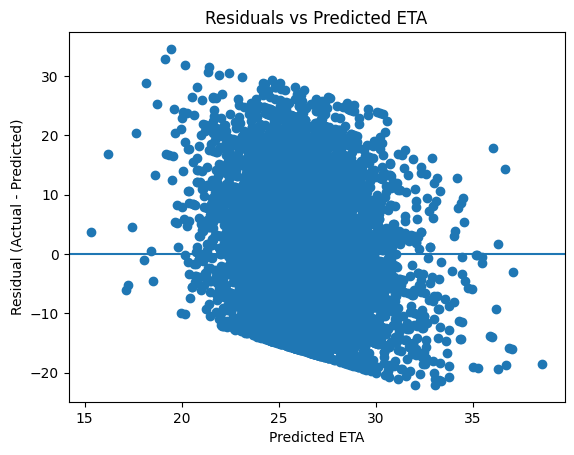

In [72]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted ETA")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted ETA")
plt.show()

##### Observations -

1) Residuals are not randomly scattered -
          They form a clear slanted/triangular pattern, it means the model error depends on the prediction level.it is heteroscedasticity (error variance changes with ETA).

2) Systematic bias at higher ETA-
          A) For higher predicted ETA (≈30-38):- Residuals are mostly negative means model is overpredicting - it is kind of good since it act as padding for higher eta.

          B) For lower ETA (≈18-22):- Residuals are mostly positive means model is underpredicting - it is kind of risk since it is breaching sla (late risk).

3) Unequal uncertainity:-
          Residual spread widens as ETA increases.One global SLA is not appropriate.confidence should depend on ETA range, so this justifies segement based SLA and prediction intervals.
   

#### Residual Distribution

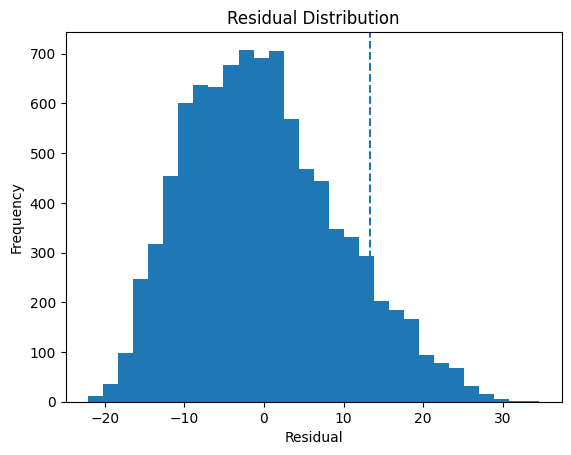

In [75]:
plt.figure()
plt.hist(residuals,bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.axvline(np.percentile(residuals,90), linestyle = "--")
plt.show()

#### Observations - 

1) Center of distribution(Good sign):- The bulk of residuals is near 0 and peak is slightly below 0 indicating most predictions are close to actual ETA and slight tendency to over-predict(negative residuals).
2) Right-skewed tail (very important) - Most deliveries are predicted well but a small fraction experience large under-predictions, these are late deliveries - SLA risk.
3) Asymmetry is not a bug here -  many small negative errors, few but significant positive errors.That is a realistic logistics model.
                                   

## Deciding SLA

The SLA is defined as a buffer over the predicted ETA, derived from residual tail analysis, rather than a fixed delivery time.

In [76]:
#Qunatifying residual risk

import numpy as np
np.percentile(residuals,[50,75,90,95])

array([-0.90695953,  6.1769743 , 13.38698883, 17.62113724])

P90 = 13.38 MINUTES, P95 = 17.62 MINUTES # in 90% of cases lateness is ≤ 13.38 min and in 95% of cases ≤ 17.62 min

SLA Decision rule - choose SLA ≥ P90 RESIDUAL - PERFECT CHOICE FOR SLA IS 15 MIN - WE CAN PROVE IT BY SLA BREACH RATE WHICH SHOULD NOT BE > 10%

In [78]:
# SLA Breach Rate

SLA = 15
sla_breach_rate = (residuals > SLA).mean()
sla_breach_rate

np.float64(0.07774975326241912)

In [79]:
# freezing SLA

pickle.dump(15,open("sla_v1.pkl","wb"))

## Stress Testing

In [1]:
import pickle

#load artifacts

model = pickle.load(open("model_v1.pkl","rb"))
X_test_scaled = pickle.load(open("X_test_scaled_v1.pkl","rb"))
y_test = pickle.load(open("y_test_v1.pkl","rb"))

In [2]:
y_pred = model.predict(X_test_scaled)

In [3]:
residuals = y_test - y_pred

### High ETA Stress

In [4]:
import pandas as pd
import numpy as np

df_stress = pd.DataFrame({"pred_eta": y_pred,"residual":residuals})

In [7]:
df_stress["eta_bucket"] = pd.cut(df_stress["pred_eta"],bins=[0,20,25,30,35,50])

In [10]:
df_stress.groupby("eta_bucket", observed=True)["residual"].agg(MAE = lambda x: np.mean(np.abs(x)), P90 = lambda x: np.percentile(x,90), SLA_breach_rate = lambda x: (x > 15).mean())

,MAE,P90,SLA_breach_rate
eta_bucket,,,
"(0, 20]",13.683190,27.041897,0.461538
"(20, 25]",7.819119,16.357047,0.118798
"(25, 30]",7.594301,12.562125,0.064766
"(30, 35]",9.222555,11.956875,0.051813
"(35, 50]",11.286801,5.466314,0.055556


#### Observations

1) Low ETA bucket is extremely risky, since SLA breach rate is higher.
2) Medium ETA buckets are the safest.
3) High ETA buckets looks safe but misleading because model is overpredicting it is ok because very few cases will be late.

Above results clearly state that SLA should be different for different segments instead of global SLA.

### Tail-Risk Stress

In [11]:
tail_threshold = np.percentile(residuals, 90)
tail_threshold

np.float64(13.386988830566409)

In [12]:
df_stress["is_tail"] = df_stress["residual"] >= tail_threshold

In [13]:
df_stress.groupby("is_tail")["pred_eta"].describe()

,count,mean,std,min,25%,50%,75%,max
is_tail,,,,,,,,
False,8207.0,26.354681,2.030906,15.338439,25.198339,26.272280,27.337877,38.566357
True,912.0,25.639833,2.333225,16.197464,24.422657,25.676293,26.957661,36.684189


In [14]:
df_stress.groupby("is_tail")["residual"].agg(mean_residual = "mean", max_residual = "max", count="count")

,mean_residual,max_residual,count
is_tail,,,
False,-2.062857,13.386396,8207
True,18.397449,34.567532,912


In [15]:
df_stress["sla_breach"] = df_stress["residual"] > 15
df_stress.groupby("sla_breach")["residual"].describe()

,count,mean,std,min,25%,50%,75%,max
sla_breach,,,,,,,,
False,8410.0,-1.671517,7.925284,-22.065903,-7.869827,-1.852182,4.032395,14.997200
True,709.0,19.613631,3.550040,15.002020,16.870127,18.661385,21.873621,34.567532


### DRIFT - DECAY SIMULATION

In [1]:
import pickle

In [2]:
pickle.load(open("features_v1.pkl","rb"))

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Road_traffic_density',
 'Vehicle_condition',
 'multiple_deliveries',
 'day',
 'month',
 'quarter',
 'year',
 'day_of_week',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_year_start',
 'is_year_end',
 'is_weekend',
 'order_prepare_time',
 'distance',
 'City_code_freq',
 'Weather_conditions_Fog',
 'Weather_conditions_Sandstorms',
 'Weather_conditions_Stormy',
 'Weather_conditions_Sunny',
 'Weather_conditions_Windy',
 'Type_of_order_Drinks ',
 'Type_of_order_Meal ',
 'Type_of_order_Snack ',
 'Type_of_vehicle_electric_scooter ',
 'Type_of_vehicle_motorcycle ',
 'Type_of_vehicle_scooter ',
 'Festival_Yes ',
 'City_Semi-Urban ',
 'City_Urban ']

In [3]:
pickle.load(open("city_freq_map_v1.pkl","rb"))

{'JAP': 0.07632834347754565,
 'RANCHI': 0.07051598398859461,
 'MUM': 0.07018698250808796,
 'BANG': 0.07007731534791907,
 'HYD': 0.06983056423753907,
 'SUR': 0.06963864670724351,
 'VAD': 0.06958381312715907,
 'COIMB': 0.06919997806656797,
 'PUNE': 0.06919997806656797,
 'INDO': 0.06884355979601908,
 'MYS': 0.06876130942589241,
 'CHEN': 0.06856939189559687,
 'AGR': 0.017519328836979767,
 'LUDH': 0.016587157975544223,
 'ALH': 0.016559741185502002,
 'KNP': 0.01612107254482645,
 'GOA': 0.01595657180457312,
 'KOC': 0.01565498711410868,
 'DEH': 0.015600153534024237,
 'BHP': 0.015271152053517574,
 'KOL': 0.015161484893348686,
 'AURG': 0.014832483412842025}